# Assessment of NPS Quiet Pavement data

This notebook carries out exploratory data analysis on the quiet pavement study data. There are two types of data considered:

- OBSI: Onboard sound intensity measurement from a fixed instrument on a measurement vehicle, traveling at 45 mph
- Passby: Road way observational data, where speed and vehicle type vary.

There are eight sites, and four pavement treatments; each pavement treatment is replicated at two sites. Sound intensity was measured pre-treatment aand post-treatment.

In the original assessment, overall the Type II microsurfacing was found to reduce overall sound intensity sound from OBSI measuremnts from 99.2 dB on average to 97.6. Other treatments did not on average reduce sound levels. 

The source data is `Data Summary QP Re-Analysis.xlsx` from 2019-06-13.

## Questions

1. The All Passby sheet seems wrong. It only has S07 measurements from 2016, and the un-dated measurements (assumed to be post-treatment) are only S01-S04. Where are the other pre-treatment data (besides S07) and the other post-treatment data (besides S01-04)?

2. Are `airTemp` and `pavetemp` available for post-treamtent passby data?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cycler import cycler

OBSI DATA

In [3]:
#Transform OBSI into column form, basic dataframe
OBSI = pd.read_excel("C:\\Quiet_Pavement_Local\\Data Summary QP Re-Analysis.xlsx", sheet_name = "ALL OBSI", header = 1).T
OBSI.rename_axis(None,axis=1, inplace = True)
OBSI.drop([0,4], axis = 1, inplace = True)
OBSI.columns = OBSI.iloc[0]
OBSI = OBSI[1:]
OBSI.reset_index(inplace = True)
OBSI.drop(["index"], axis = 1, inplace = True)
OBSI.columns.name = None
#Adds pavement type into dataframe
#Turn values into a lists if you want to add other metadata
pavement_type = {
    1: "3/8in Chip Seal",
    2: "1/4in Chip Seal",
    3: "Type II Microsurfacing",
    4: "Type III Microsurfacing",
    5: "3/8in Chip Seal",
    6: "Type III Microsurfacing",
    7: "Type II Microsurfacing",
    8: "1/4in Chip Seal"
}
OBSI["Pavement Type"]=[pavement_type[s] for s in OBSI["Site"]]

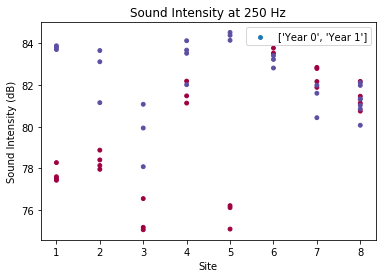

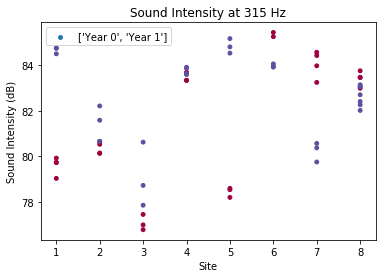

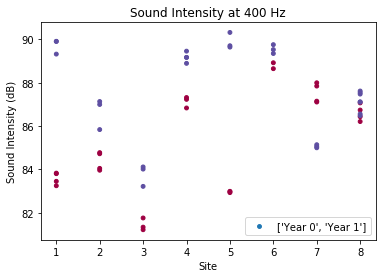

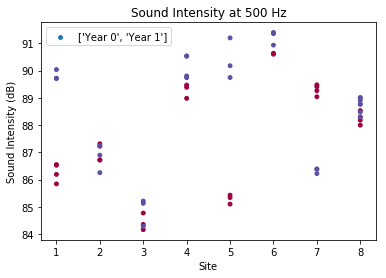

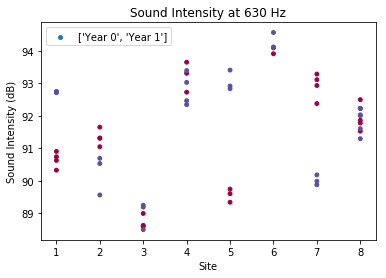

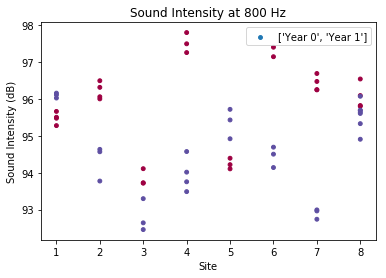

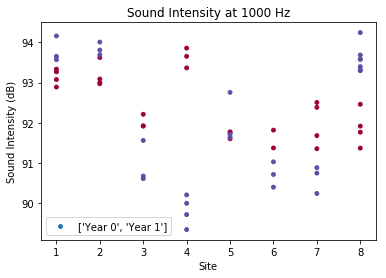

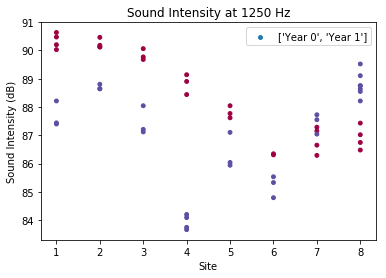

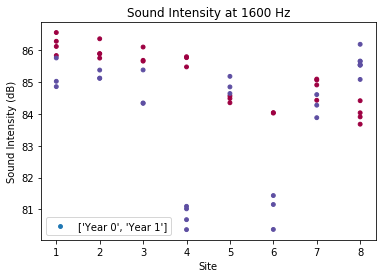

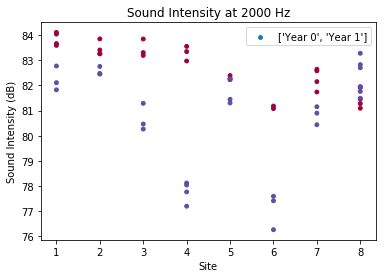

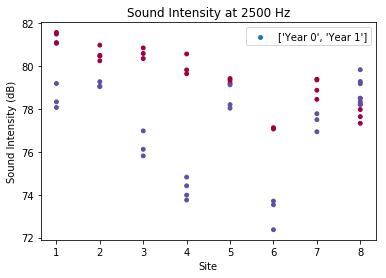

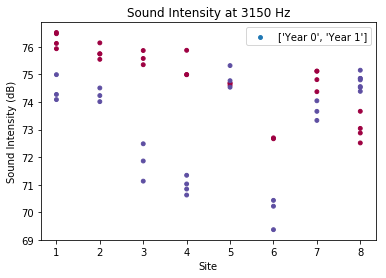

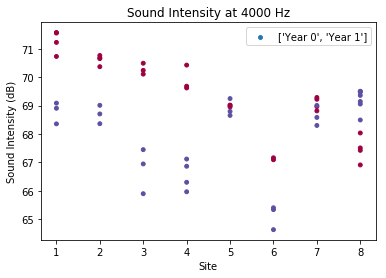

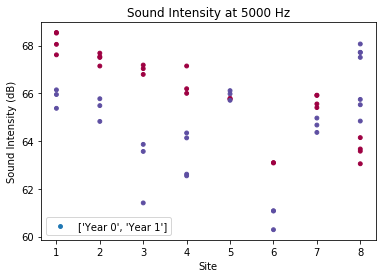

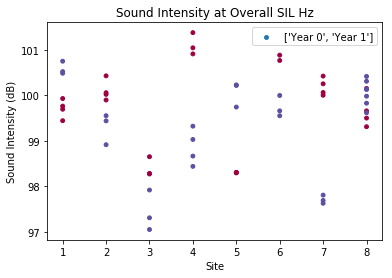

In [6]:
# Plot data by site and sound intensity. Each figure is a different frequency
# Last column describes pavement treatment type
# Red = pre-treatment, purple = post treatment. 
for freq in OBSI.columns[3:(len(OBSI.columns)-1)]:
    plt.figure()
    plt.scatter(OBSI["Site"],OBSI[freq], s = 15, c = OBSI["Measurement Year"], cmap = 'Spectral') #, label = ["Year 0", "Year 1"])
    plt.title("Sound Intensity at " + str(freq) + " Hz")
    plt.xlabel("Site")
    plt.ylabel("Sound Intensity (dB)")
    plt.legend() # Only shows freq; how do we get it to follow arguments from plt.scatter? 
    # plt.ylim(58,105)

In [4]:
#Group data by year, site, pavement type, and replicates
OBSI_grouped = OBSI.set_index(["Measurement Year", "Site", "Pavement Type","Replicates"])
OBSI_grouped= OBSI_grouped.swaplevel("Pavement Type", "Site") # Use this to swap levels
OBSI_grouped.sort_index(inplace=True)
OBSI_grouped = OBSI_grouped.astype(float)

In [5]:
# OBSI # Uncomment to see entire data frame

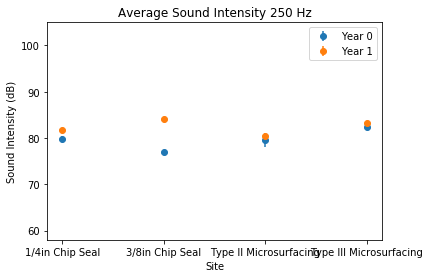

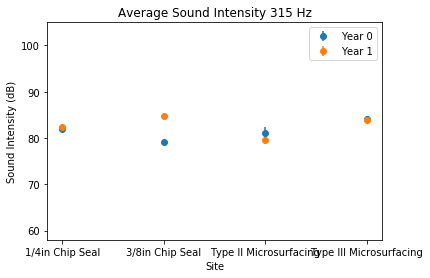

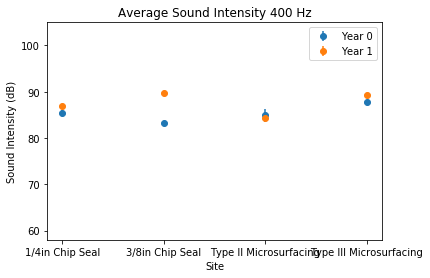

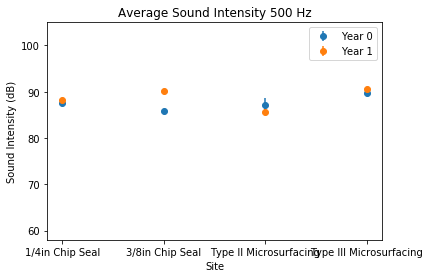

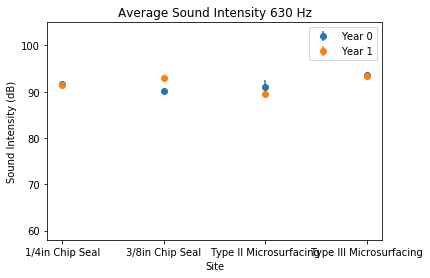

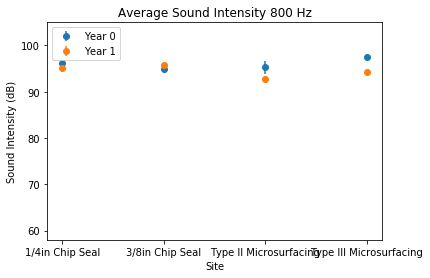

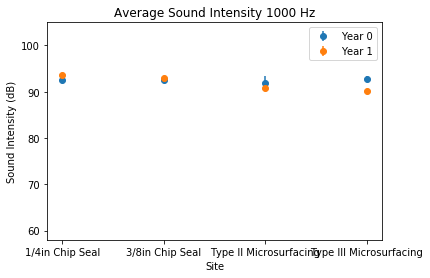

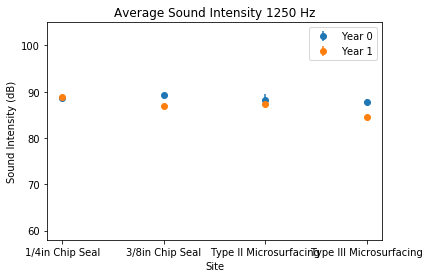

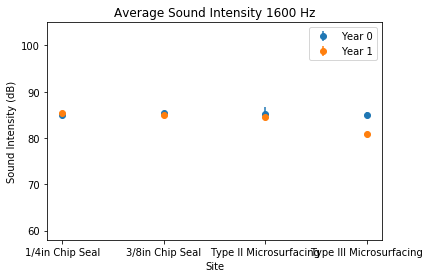

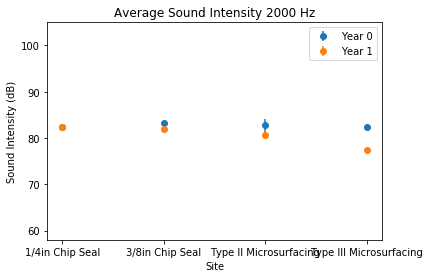

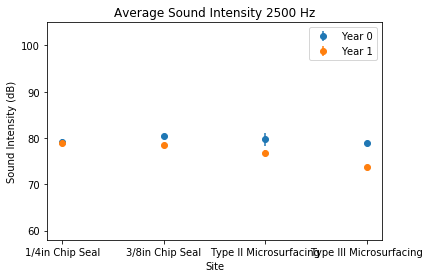

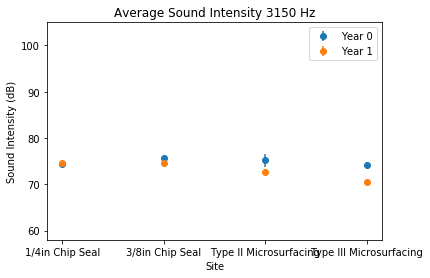

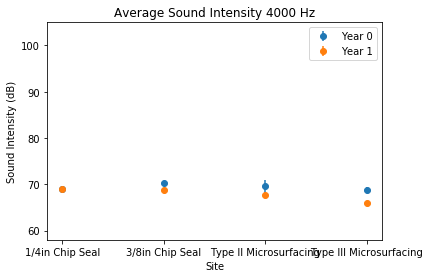

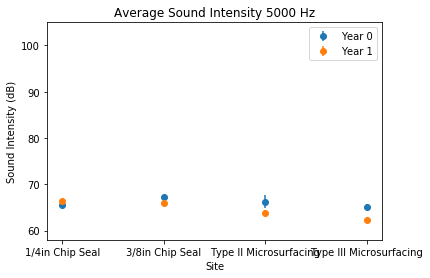

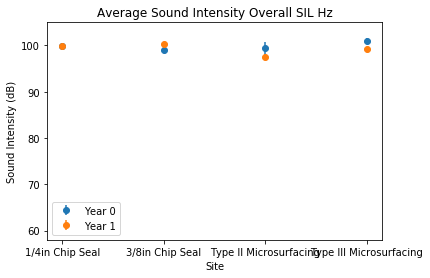

In [6]:
# Mean grouped by year and site
OBSI_mean_by_site = OBSI_grouped.groupby(level = [0,1]).mean()
OBSI_yearly_sem = OBSI_grouped.groupby(level = [0,1]).sem()
#Plot data by site and sound intensity averaged and separated by year
for freq in OBSI_mean_by_site.columns:
    plt.figure()
    plt.errorbar(OBSI_mean_by_site.loc[0].index,OBSI_mean_by_site.loc[0][freq], 
                OBSI_yearly_sem.loc[0][250], ls = "None",marker = ".", ms= 12, label = "Year 0")
    plt.errorbar(OBSI_mean_by_site.loc[1].index,OBSI_mean_by_site.loc[1][freq],
                OBSI_yearly_sem.loc[1][250], ls = "None",marker = ".", ms = 12, label = "Year 1")
    plt.legend()
    plt.xlabel("Site")
    plt.ylabel("Sound Intensity (dB)")
    plt.ylim(58,105)
    plt.title("Average Sound Intensity "+ str(freq) + " Hz")

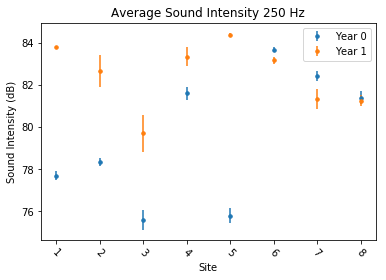

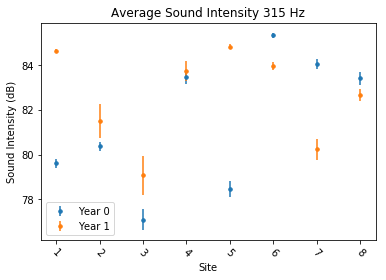

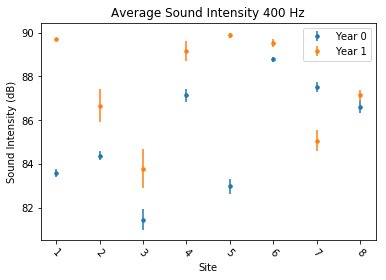

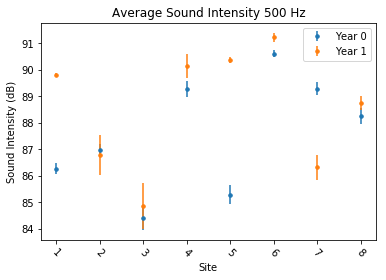

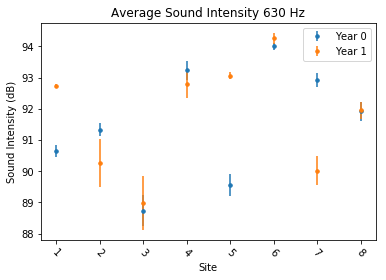

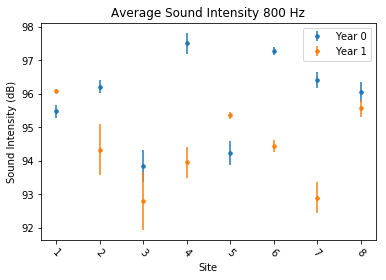

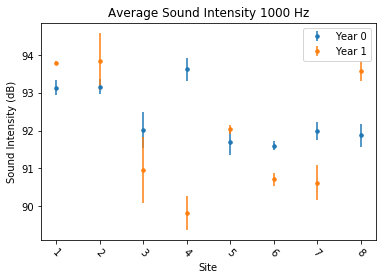

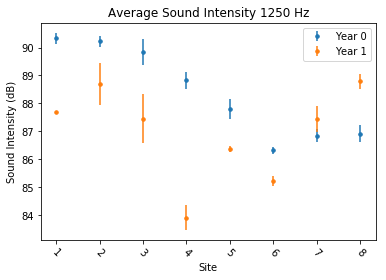

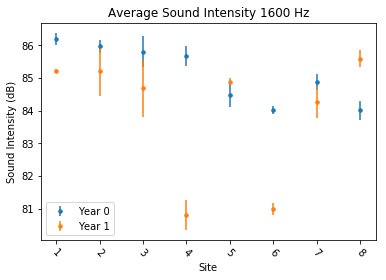

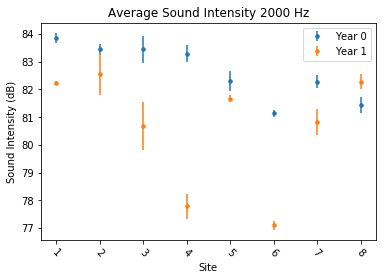

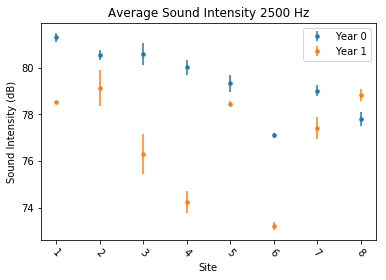

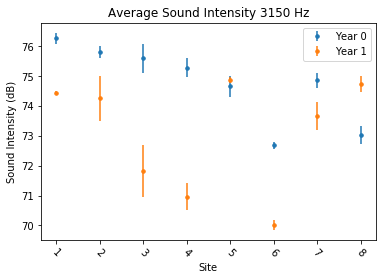

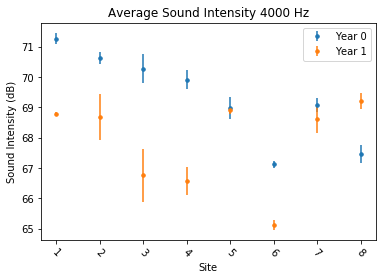

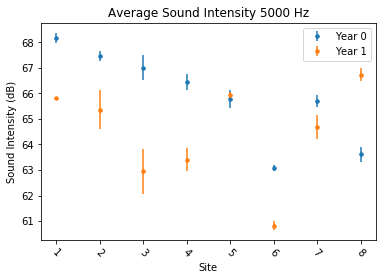

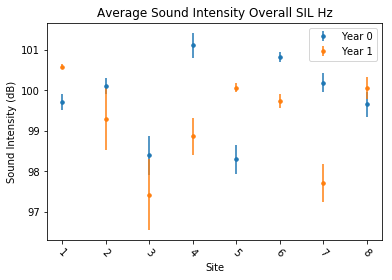

In [7]:
# Mean grouped by year and pavement type

# TODO: Organize by treatment type in pairs
# TODO: Look at larger groupings as well, by year and chip vs microsurface

OBSI_mean_by_pavement = OBSI_grouped.groupby(level = [0,2]).mean()
OBSI_sem_by_pavement = OBSI_grouped.groupby(level = [0,2]).sem()

#PLOT
for freq in OBSI_mean_by_pavement.columns:
    plt.figure()
    plt.errorbar(OBSI_mean_by_pavement.loc[0].index,OBSI_mean_by_pavement.loc[0][freq], 
                OBSI_sem_by_pavement.loc[0][250], ls = "None",marker = ".", ms= 7, label = "Year 0")
    plt.errorbar(OBSI_mean_by_pavement.loc[1].index,OBSI_mean_by_pavement.loc[1][freq],
                OBSI_sem_by_pavement.loc[1][250], ls = "None",marker = ".", ms = 7, label = "Year 1")
    plt.legend()
    plt.xlabel("Site")
    plt.ylabel("Sound Intensity (dB)")
    plt.xticks(rotation=-45)
#     plt.ylim(58,105)
    plt.title("Average Sound Intensity "+ str(freq) + " Hz")

In [8]:
#Count how many datapoints are in each grouping
OBSI_counts_by_site =OBSI_grouped.groupby(level = [0,1]).count()
OBSI_counts_by_pavement =OBSI_grouped.groupby(level = [0,2]).count()
OBSI_counts_by_pavement, OBSI_counts_by_site

(                       250  315  400  500  630  800  1000  1250  1600  2000  \
 Measurement Year Site                                                         
 0                1       4    4    4    4    4    4     4     4     4     4   
                  2       4    4    4    4    4    4     4     4     4     4   
                  3       3    3    3    3    3    3     3     3     3     3   
                  4       3    3    3    3    3    3     3     3     3     3   
                  5       3    3    3    3    3    3     3     3     3     3   
                  6       2    2    2    2    2    2     2     2     2     2   
                  7       4    4    4    4    4    4     4     4     4     4   
                  8       4    4    4    4    4    4     4     4     4     4   
 1                1       3    3    3    3    3    3     3     3     3     3   
                  2       3    3    3    3    3    3     3     3     3     3   
                  3       3    3    3   

In [9]:
#Transform data to look at all frequences for each site
#Group data by site, year, and pavement type
OBSIfreq = OBSI_grouped.T

# OBSIfreq_mean_type = OBSIfreq[:14].groupby(level = [1],axis = 1).mean()
OBSIfreq_mean_site = OBSIfreq[:14].groupby(level = [2],axis = 1).mean()
OBSIfreq_mean_yr_type = OBSIfreq[:14].groupby(level = [0,1],axis = 1).mean()
OBSIfreq_mean_yr_site = OBSIfreq[:14].groupby(level = [0,2],axis = 1).mean()

# OBSIfreq_sem_type = OBSIfreq[:14].groupby(level = [1],axis = 1).sem()
OBSIfreq_sem_site = OBSIfreq[:14].groupby(level = [2],axis = 1).sem()
OBSIfreq_sem_yr_type = OBSIfreq[:14].groupby(level = [0,1],axis = 1).sem()
OBSIfreq_sem_yr_site = OBSIfreq[:14].groupby(level = [0,2],axis = 1).sem()

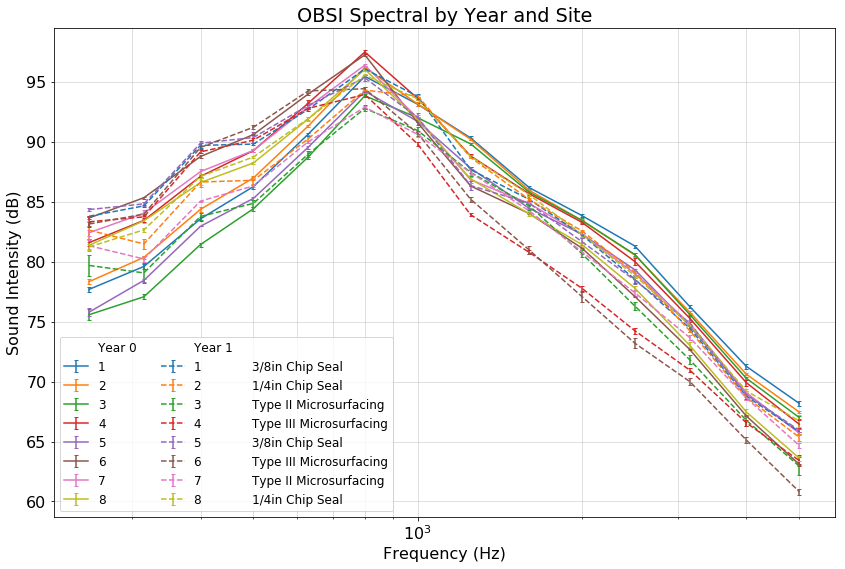

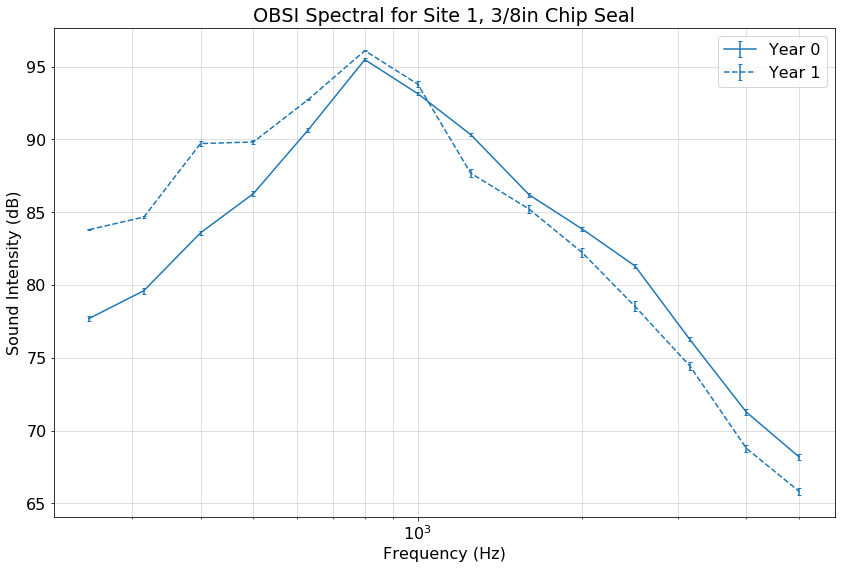

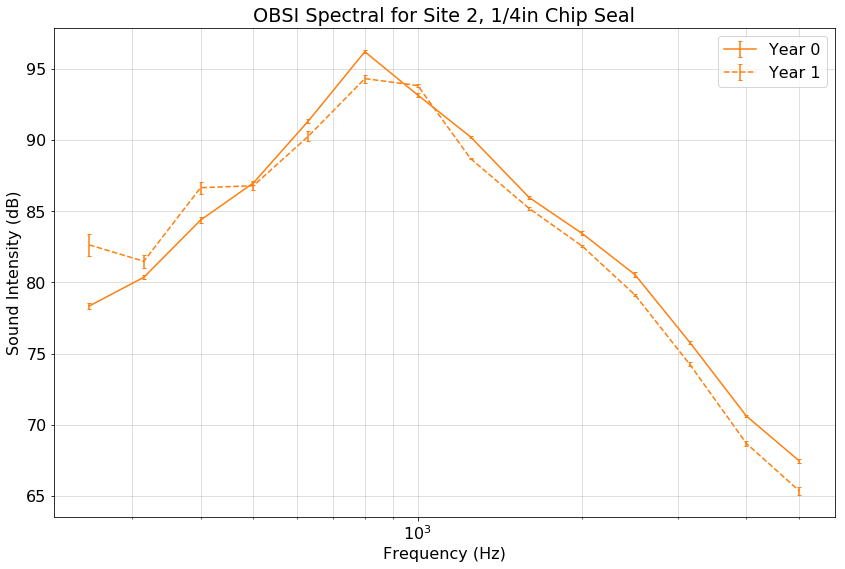

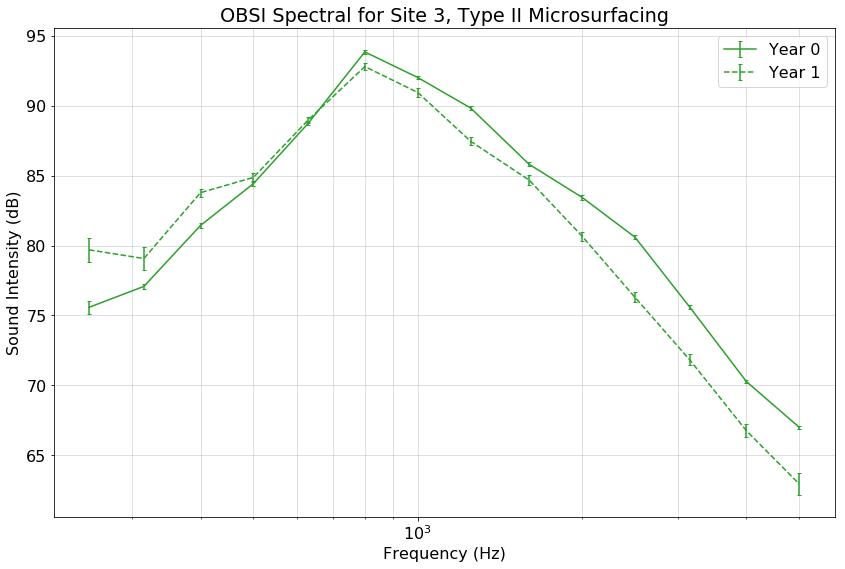

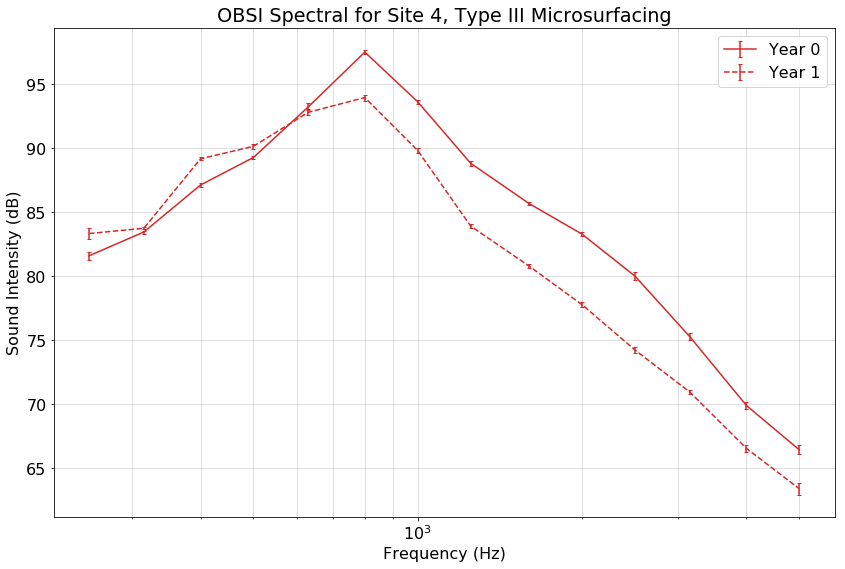

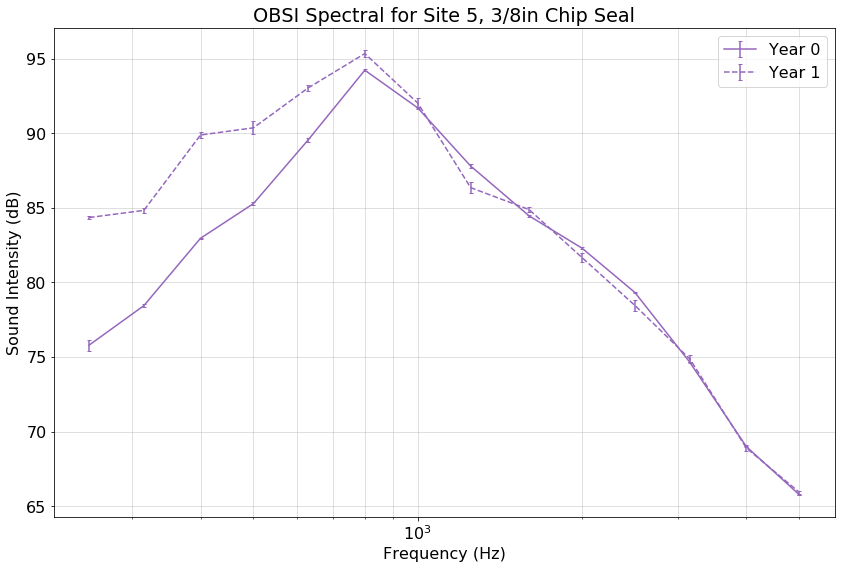

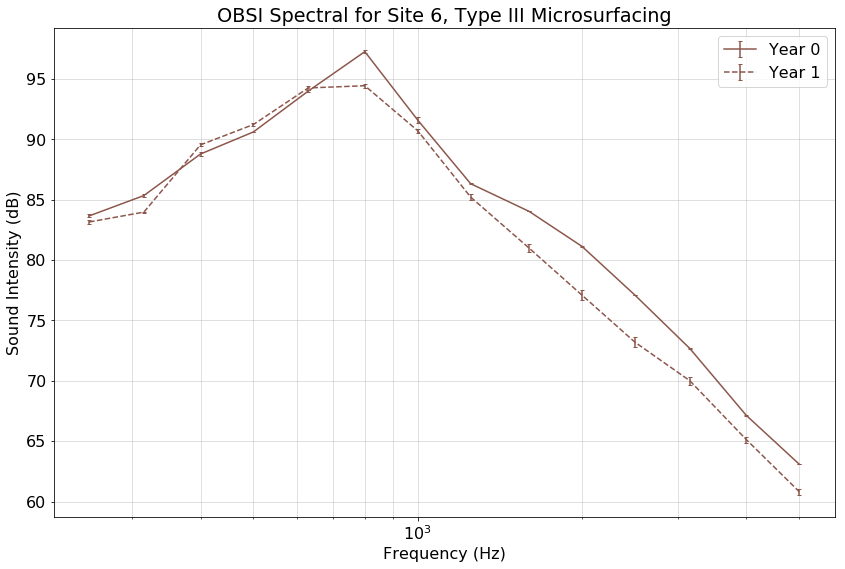

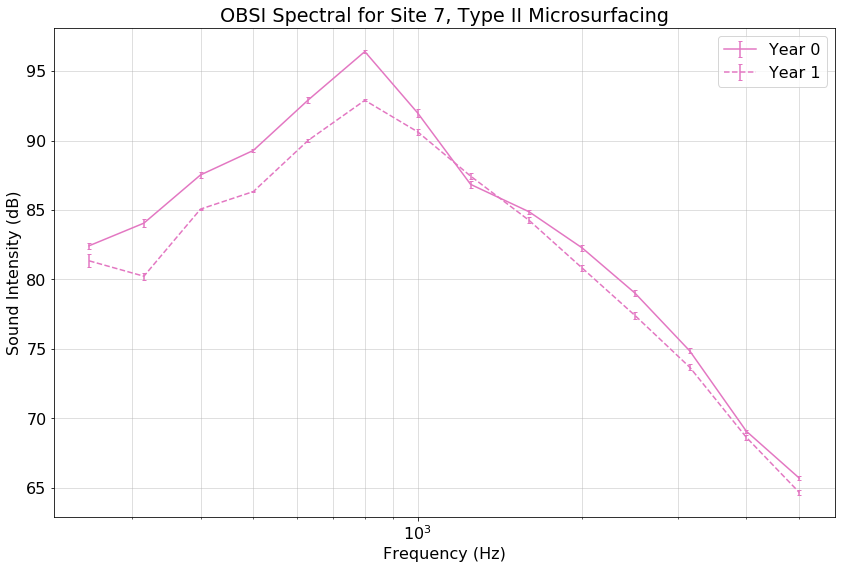

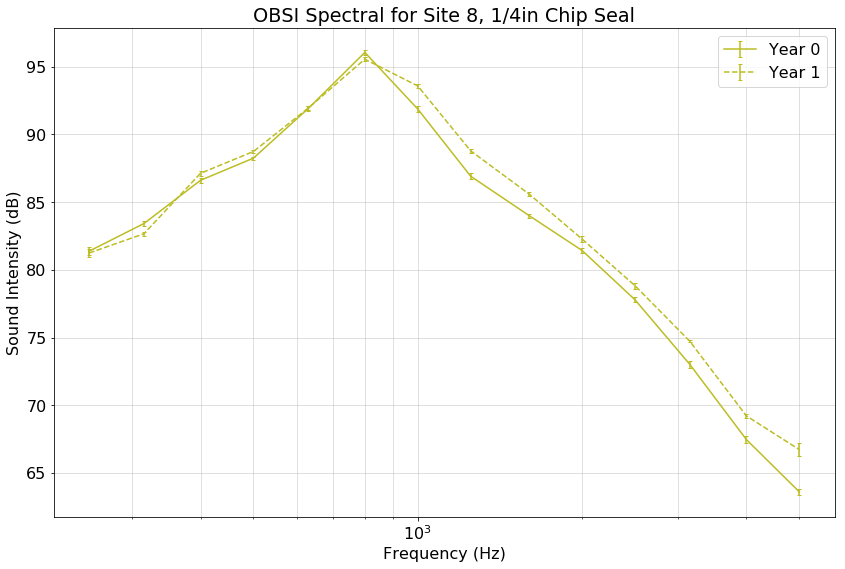

In [10]:
plt.figure(figsize = (14,9))
plt.rcParams.update({"font.size":16})
plt.rc("axes", prop_cycle=(cycler('color',['#1f77b4','#ff7f0e','#2ca02c','#d62728',
                                          '#9467bd','#8c564b','#e377c2', '#bcbd22'])))

for yr in [0,1]:
    for site in range(1,9):
        if yr == 0:
            plt.errorbar(OBSIfreq_mean_yr_site.index, OBSIfreq_mean_yr_site[yr][site],OBSIfreq_sem_yr_site[yr][site],
                    capsize = 2, linestyle = "-")
        else:
            plt.errorbar(OBSIfreq_mean_yr_site.index, OBSIfreq_mean_yr_site[yr][site],OBSIfreq_sem_yr_site[yr][site],
                    capsize = 2, linestyle = "--", label = str(site) + "             "+pavement_type[site])
            
h, l = plt.gca().get_legend_handles_labels()
ph = [plt.plot([], marker = "", ls = "")[0]]
handles = ph + h[0:int(len(h)/2)]+ ph+ h[int(len(h)/2):]
labels = ["Year 0"]+l[0:int(len(h)/2)]+["Year 1"]+l[int(len(h)/2):]

plt.grid(which = "both", alpha = 0.5)
plt.legend(handles, labels,  prop={'size': 12}, ncol = 2)
plt.grid(which = "both", alpha = 0.5)
plt.title("OBSI Spectral by Year and Site")
plt.xscale("log")
plt.ylabel("Sound Intensity (dB)")
plt.xlabel("Frequency (Hz)")

#Site Comparisons
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2', '#bcbd22']
for site, col in zip(range(1,9), colors):
    plt.figure(figsize = (14,9))
    for yr in [0,1]:
        if yr == 0:
            plt.errorbar(OBSIfreq_mean_yr_site.index, OBSIfreq_mean_yr_site[yr][site],OBSIfreq_sem_yr_site[yr][site],
                    capsize = 2, linestyle = "-", label = "Year 0", color = col)
        else:
            plt.errorbar(OBSIfreq_mean_yr_site.index, OBSIfreq_mean_yr_site[yr][site],OBSIfreq_sem_yr_site[yr][site],
                    capsize = 2, linestyle = "--", label = "Year 1", color = col)

    plt.legend()
    plt.grid(which = "both", alpha = 0.5)
    plt.title("OBSI Spectral for Site " + str(site) + ", " +pavement_type[site])
    plt.xscale("log")
    plt.ylabel("Sound Intensity (dB)")
    plt.xlabel("Frequency (Hz)")

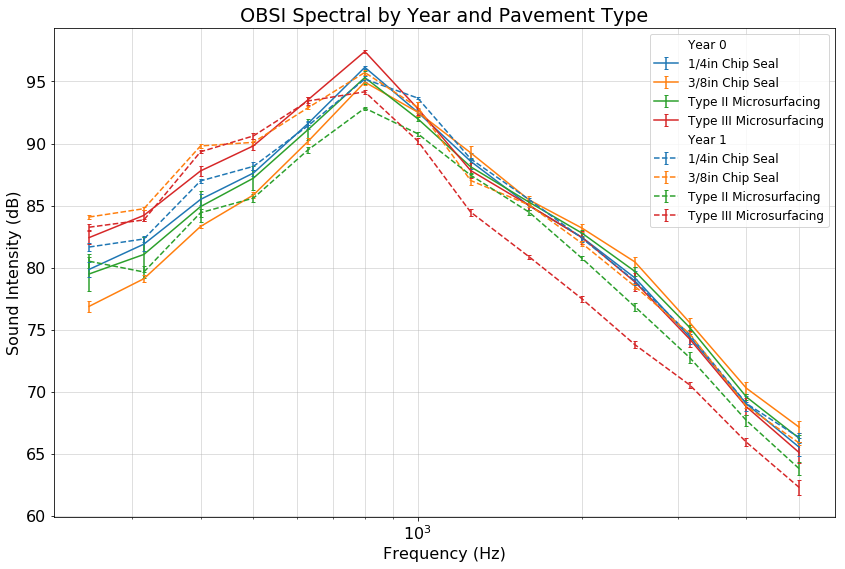

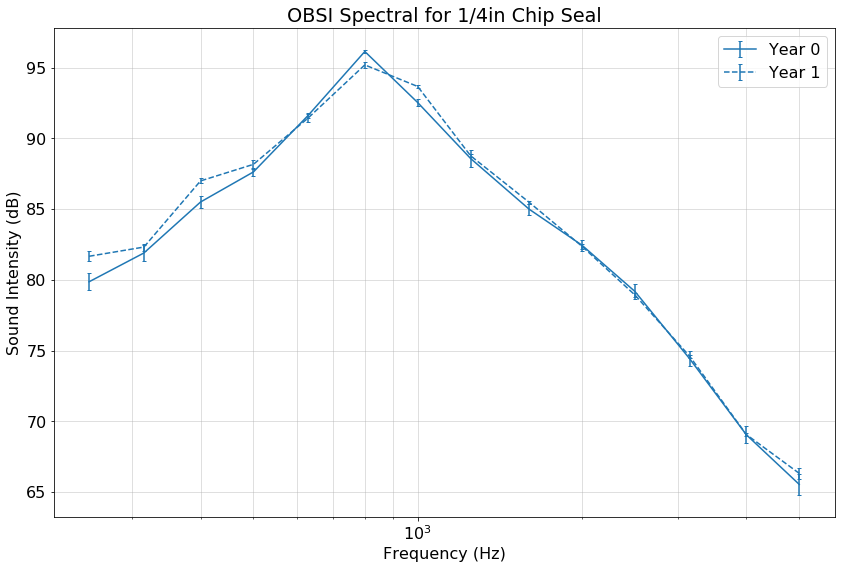

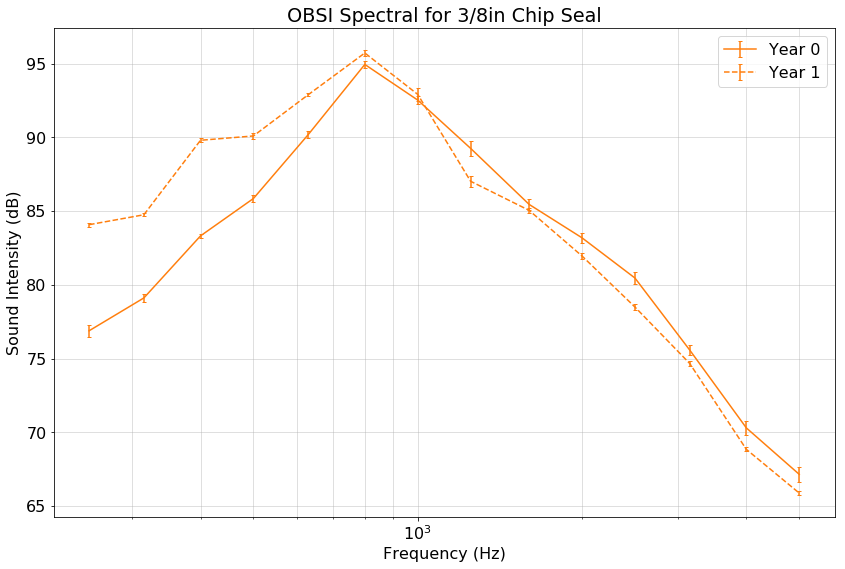

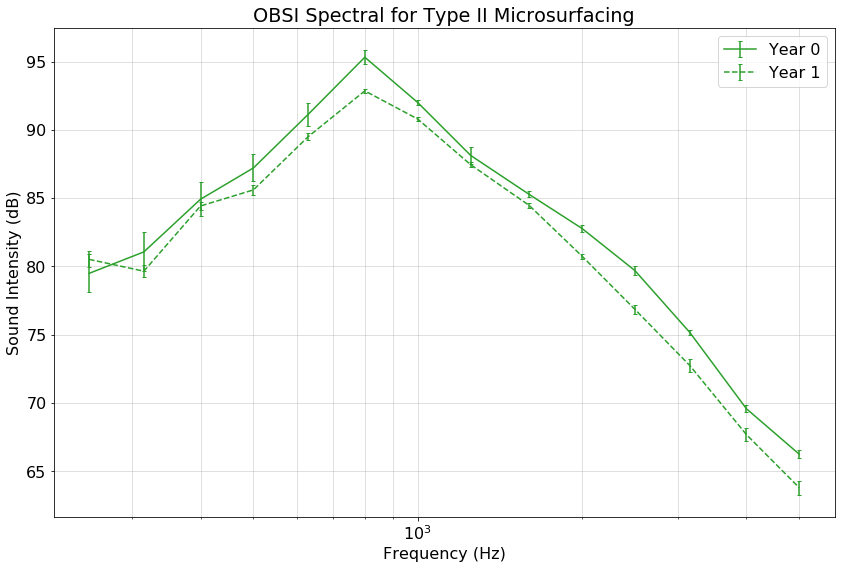

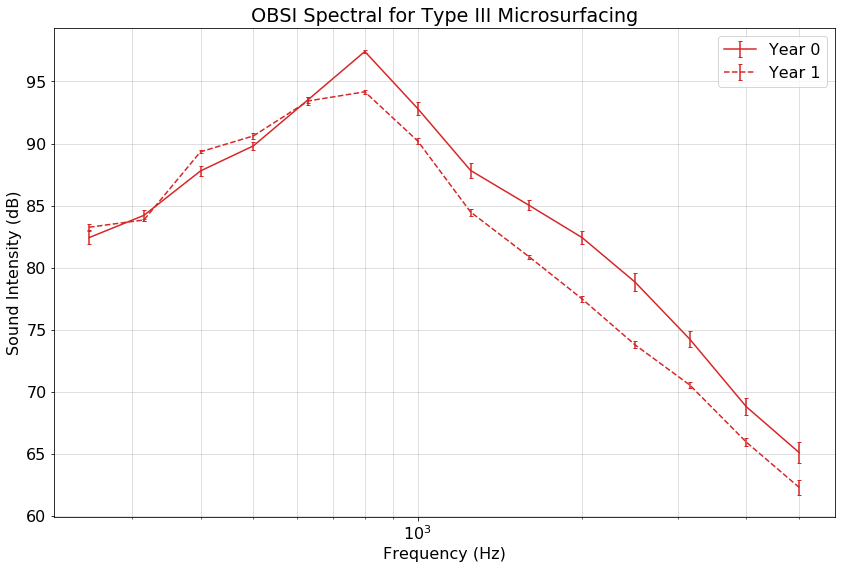

In [11]:
#Figures for Year and Pavement Type Grouping
plt.figure(figsize = (14,9))
plt.rcParams.update({'font.size': 16})
plt.rc("axes", prop_cycle=(cycler('color',['#1f77b4','#ff7f0e','#2ca02c','#d62728'])))
for yr in [0,1]:
    for ptype in OBSIfreq_mean_yr_type.columns.levels[1]:
        if yr == 0:
            plt.errorbar(OBSIfreq_mean_yr_type.index, OBSIfreq_mean_yr_type[yr][ptype],OBSIfreq_sem_yr_type[yr][ptype],
                    capsize = 2)
        else:
            plt.errorbar(OBSIfreq_mean_yr_type.index, OBSIfreq_mean_yr_type[yr][ptype],OBSIfreq_sem_yr_type[yr][ptype],
                    capsize = 2, linestyle = "--")

h, l = plt.gca().get_legend_handles_labels()
ph = [plt.plot([], marker = "", ls = "")[0]]
handles = ph + h[0:int(len(h)/2)]+ ph+ h[int(len(h)/2):]
labels = ["Year 0"]+l[0:int(len(h)/2)]+["Year 1"]+l[int(len(h)/2):]
plt.grid(which = "both", alpha = 0.5)
plt.legend(handles, labels,  prop={'size': 12})
plt.grid(which = "both", alpha = 0.5)
plt.title("OBSI Spectral by Year and Pavement Type")
plt.xscale("log")
plt.ylabel("Sound Intensity (dB)")
plt.xlabel("Frequency (Hz)")

#Site comparisons
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
for ptype, col in zip(OBSIfreq_mean_yr_type.columns.levels[1], colors):
    plt.figure(figsize = (14,9))
    for yr in [0,1]:
        if yr == 0:
            plt.errorbar(OBSIfreq_mean_yr_type.index, OBSIfreq_mean_yr_type[yr][ptype],OBSIfreq_sem_yr_type[yr][ptype],
                    capsize = 2, color = col, label = "Year 0")
        else:
            plt.errorbar(OBSIfreq_mean_yr_type.index, OBSIfreq_mean_yr_type[yr][ptype],OBSIfreq_sem_yr_type[yr][ptype],
                    capsize = 2, linestyle = "--", color = col, label = "Year 1")
    plt.grid(which = "both", alpha = 0.5)
    plt.legend()
    plt.title("OBSI Spectral for " + ptype)
    plt.xscale("log")
    plt.ylabel("Sound Intensity (dB)")
    plt.xlabel("Frequency (Hz)")    

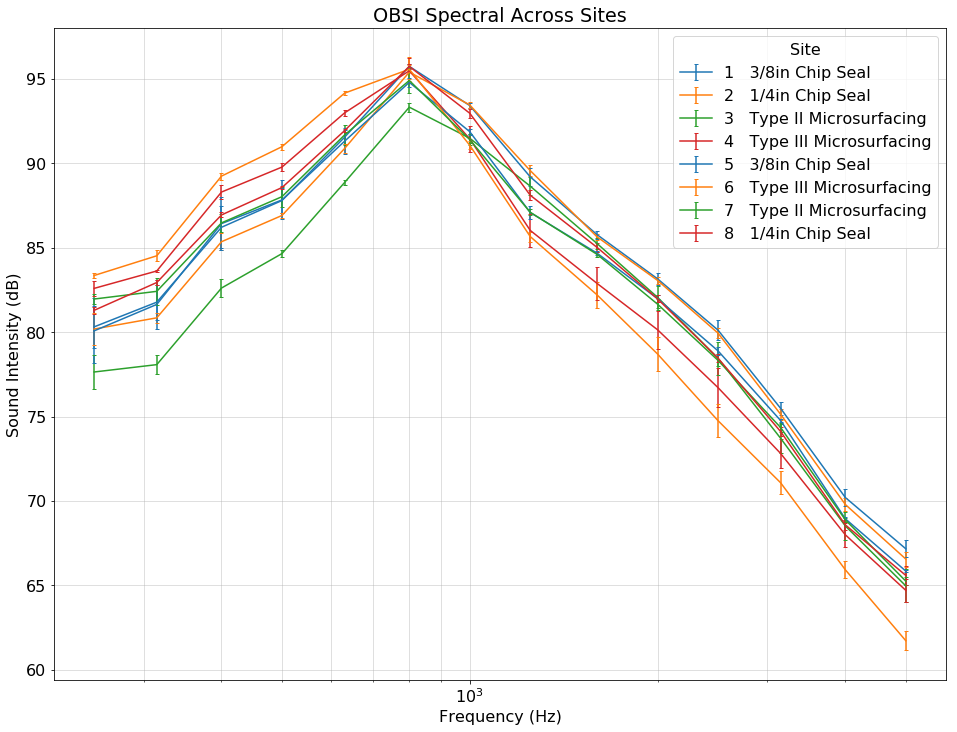

In [12]:
#Figures for site grouping
plt.figure(figsize = (16,12))
plt.rcParams.update({'font.size': 16})
for site in OBSIfreq_mean_site.columns:
    plt.errorbar(OBSIfreq_mean_site.index, OBSIfreq_mean_site[site], OBSIfreq_sem_site[site],
                capsize = 2, label = str(site) + "   "+pavement_type[site])
plt.xscale("log")
plt.grid(which = "both", alpha = 0.5)
plt.title("OBSI Spectral Across Sites")
plt.ylabel("Sound Intensity (dB)")
plt.xlabel("Frequency (Hz)")
plt.legend(title = "Site")

ALL PASSBY DATA

In [15]:
#All passby data as a dataframe with a single header that are tuples
# allpassby_single_header = pd.read_excel("C:\\Quiet_Pavement_Local\\Data Summary QP Re-Analysis.xlsx", sheet_name="All Passby", header =0)
#allpassby.columns_single_header = [(first,second) for first, second in zip(allpassby.iloc[0],allpassby.iloc[1])]

In [16]:
#Processes allpassby data, turns two row header into one row header as a tuple
allpassby = pd.read_excel("C:\\Quiet_Pavement_Local\\Data Summary QP Re-Analysis.xlsx", sheet_name="All Passby", header =0)
allpassby.dropna(axis = 0, how = "all",inplace = True)
allpassby.dropna(axis = 1, how = "all", inplace = True)
allpassby.set_index(["Unnamed: 2"], inplace = True)

#Drop Meas Year, date, passtime, halfstep, vehtype, clean, Comment, winddir,
# cloud, ParkName, SiteName (the second one), and IntTemp
#These columns are either irrelevant, only exist for site 07, or are empty
allpassby.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6",
                "Unnamed: 8","Unnamed: 12","Unnamed: 13","Unnamed: 15","Unnamed: 16", "Unnamed: 22"], axis = 1, inplace = True)

#Drop accidentally copy/pasted frequency data
droplist = []
for i in range(97,133):
    droplist.append("Unnamed: "+str(i))
allpassby.drop(droplist, axis = 1, inplace = True)

#Create multilevel columns
header_corrections = []
for a,b in zip(allpassby.loc["sitename"].values.tolist(), allpassby.columns.tolist()):
    if isinstance(a,float):
        if "1/3 LZFeq" in b:
            header_corrections.append("1/3 LZFeq")
        else:
            header_corrections.append("1/3 LZFmax")
    else:
        header_corrections.append(a)
allpassby.columns = [header_corrections, allpassby.loc["sitename"].values.tolist()]
allpassby.drop(["sitename"],axis = 0, inplace = True)

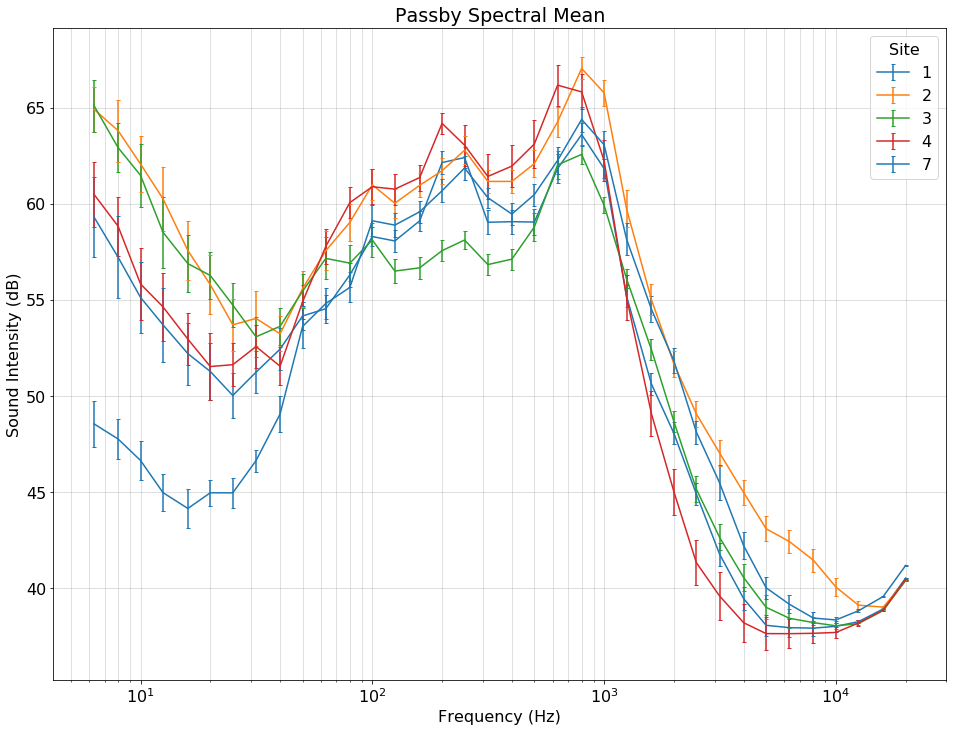

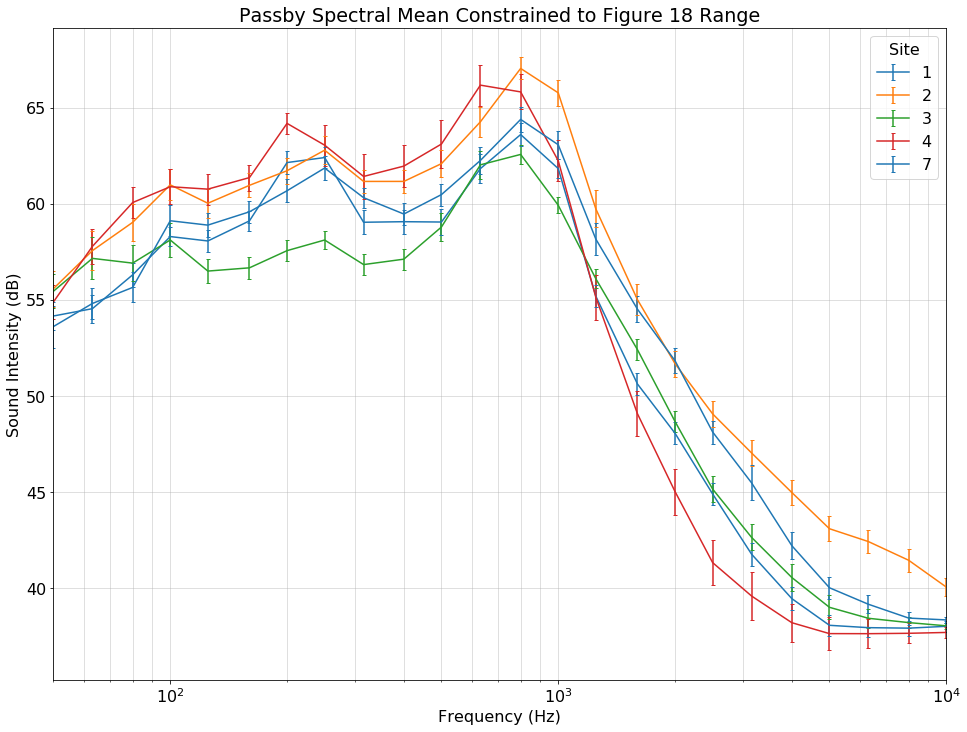

In [17]:
#Mean sound intensity figures across all sites
sites = [1,2,3,4,7]

plt.figure(figsize = (16,12))
for site in sites:
    mean=allpassby["1/3 LZFeq"].loc["S0" + str(site)].mean()
    sem = allpassby["1/3 LZFeq"].loc["S0" + str(site)].sem()
    plt.errorbar(mean.axes[0], mean.values, sem.values, label = site, capsize = 2)
    plt.xscale("log")
    
plt.grid(which = "both", alpha = 0.5)
plt.title("Passby Spectral Mean")
plt.ylabel("Sound Intensity (dB)")
plt.xlabel("Frequency (Hz)")
plt.legend(title = "Site")

#Mean sound intensity figures, x axis constrained to figure 18 range
plt.figure(figsize = (16,12))
for site in sites:
    mean=allpassby["1/3 LZFeq"].loc["S0" + str(site)].mean()
    sem = allpassby["1/3 LZFeq"].loc["S0" + str(site)].sem()
    plt.errorbar(mean.axes[0], mean.values, sem.values, label = site, capsize = 2)
    plt.xscale("log")
plt.xlim(50,10000)  
plt.grid(which = "both", alpha = 0.5)
plt.title("Passby Spectral Mean Constrained to Figure 18 Range")
plt.ylabel("Sound Intensity (dB)")
plt.xlabel("Frequency (Hz)")
plt.legend(title = "Site")

In [19]:
allpassby.head()

speed airTemp  RH windspeed pavetemp LAFeq LASmax LAFmax LZFeq  \
           speed airTemp  RH windspeed pavetemp LAFeq LASmax LAFmax LZFeq   
Unnamed: 2                                                                  
S07           39      90  18      calm      100  63.2   61.4   63.9  69.8   
S07           45      86  25      calm       91  68.2   66.9   69.1  74.5   
S07           45      90  18      calm      100  70.1     68   70.8  73.6   
S07           46      80  26      calm       81    68   66.2   69.3  72.7   
S07           46      80  26      calm       81  66.9   65.2   68.3    71   

           LZSmax  ... 1/3 LZFmax                                             \
           LZSmax  ...     2500.0 3150.0 4000.0 5000.0 6300.0 8000.0 10000.0   
Unnamed: 2         ...                                                         
S07          70.7  ...       44.2   41.0   38.2   37.5   36.9   37.1    37.8   
S07          75.3  ...       47.5   43.3   40.5   39.1   38.4   37.6    38.4   
S07          74.4  ...       47.0   43.6   40.7   39.2   38.6   38.2    38.4   
S07          73.7  ...       48.4   45.7   41.7   39.4   38.6   37.9    37.8   
S07          72.5  ...       48.5   44.7   41.3   39.3   38.2   37.9    38.3   

                                    
           12500.0 16000.0 20000.0  
Unnamed: 2                          
S07           38.8    39.9    41.4  
S07           38.8    39.7    41.4  
S07           39.1    39.7    41.5  
S07           38.8    39.5    41.2  
S07           38.9    39.6    41.4  

[5 rows x 82 columns]